## Imports

In [44]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


In [45]:
import data_utilities.aug_util as aug
import data_utilities.wv_util as wv

In [46]:
# local figure path
save_path="/Users/heidihurst/Documents/UK/ucl-gis/dissertation/screenshots_images/"
# latex project figure path
# image_path= "/Users/heidihurst/Documents/UK/ucl-gis/dissertation/writeup/16819348ghkbpztpjpfj/Figures/"

In [47]:
factors = ["1", "1.5", "2", "2.5", "3", "3.5", "4"]

In [48]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

## Single Example (Result)

In [49]:
img_no = 89
# PARKING LOT BINGO
crop_rect = (0, 900, 200, 1200)
cr2 = [0.0, 915.0, 75.0, 960.0]
trial = "t7"
df = "1"

In [50]:
text = "../data/{}/{}_{}_{}.tif.txt".format(img_no, trial, df, img_no)
img = "../data/{}/{}_downsample_{}.tif".format(img_no,img_no,df)

In [51]:
# read in text file to numpy array
results = np.loadtxt(text)
best_results = [x[0:4] for x in results if x[5]>0.5]
best_results = np.array(best_results)

In [52]:
crop_rect=[0, 900, 200, 1200]
cr = [x/float(df) for x in crop_rect]

In [53]:
im = np.array(Image.open(img))

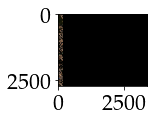

In [54]:
plt.imshow(im)
plt.show()

In [55]:
best = aug.draw_bboxes(im, best_results)

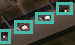

In [56]:
best.crop(cr2)

## Ground Truth Example

In [57]:
# import ground truth bboxes to compare (maybe make a different color?)
car_truth = '../data/test_util_justcars.geojson'#'justcars.geojson'
all_truth = '../data/xView_train.geojson'

In [58]:
coords, chips, classes = wv.get_labels(all_truth)

100%|██████████| 601937/601937 [00:05<00:00, 103427.25it/s]


In [59]:
def plot_truth(img_no, truth, crop_rect=[0, 900, 200, 1200]):
    # read in image
    img = "../data/{}/{}_downsample_1.tif".format(img_no,img_no)
    im = np.array(Image.open(img))
    
    # get informtation from ground truth and filter for current image
    coords, chips, classes = wv.get_labels(truth)
    gt_coords = coords[chips=='{}.tif'.format(img_no)]
    gt_classes = classes[chips=='{}.tif'.format(img_no)]
    
    # draw boxes on top of image
    tru = aug.draw_bboxes(im, gt_coords, gt_classes)
    
    # crop and return
    return tru.crop(crop_rect)

In [60]:
def class_color(class_number, default="#49b8a8"):
	"""
	Picks color to make box
	"""
	if class_number == 18:
		return default

	elif class_number != 18:
		cmap = cm.gist_ncar
		norm = Normalize(vmin=16, vmax=95)

		return to_hex(cmap(norm(class_number)))

In [16]:
gt_coords = coords[chips=='{}.tif'.format(img_no)]

In [17]:
tru = aug.draw_bboxes(im,gt_coords)

In [18]:
cl2 = classes[chips == '89.tif']

In [19]:
colors2 = [aug.class_color(x) for x in cl2]

In [20]:
img = "../data/{}/{}_downsample_1.tif".format(img_no,img_no)
im = np.array(Image.open(img))

# coords, chips, classes = wv.get_labels(truth)
gt_coords = coords[chips=='{}.tif'.format(img_no)]
    

In [21]:
tru = aug.draw_bboxes(im, gt_coords, classes)

data_utilities/aug_util.py:202: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if classes == None:


In [61]:
source = Image.fromarray(im)
draw = ImageDraw.Draw(source)

import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib.colors import to_hex

cmap = cm.gist_ncar
norm = Normalize(vmin=16, vmax=95)
print cmap(norm(20))
print to_hex(cmap(norm(20)))


for j in range(3):
    draw.rectangle(((10-j,10-j),(500+j,500+j)), outline=to_hex(cmap(norm(20))))
    


(0.0, 0.34343713956170707, 0.059277970011533954, 1.0)
#00580f


In [24]:
cropped_im = tru.crop(cr)

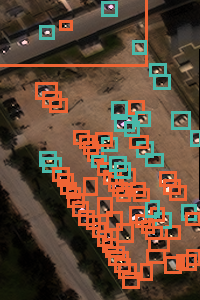

In [25]:
cropped_im

In [26]:
colors = [class_color(x) for x in classes]

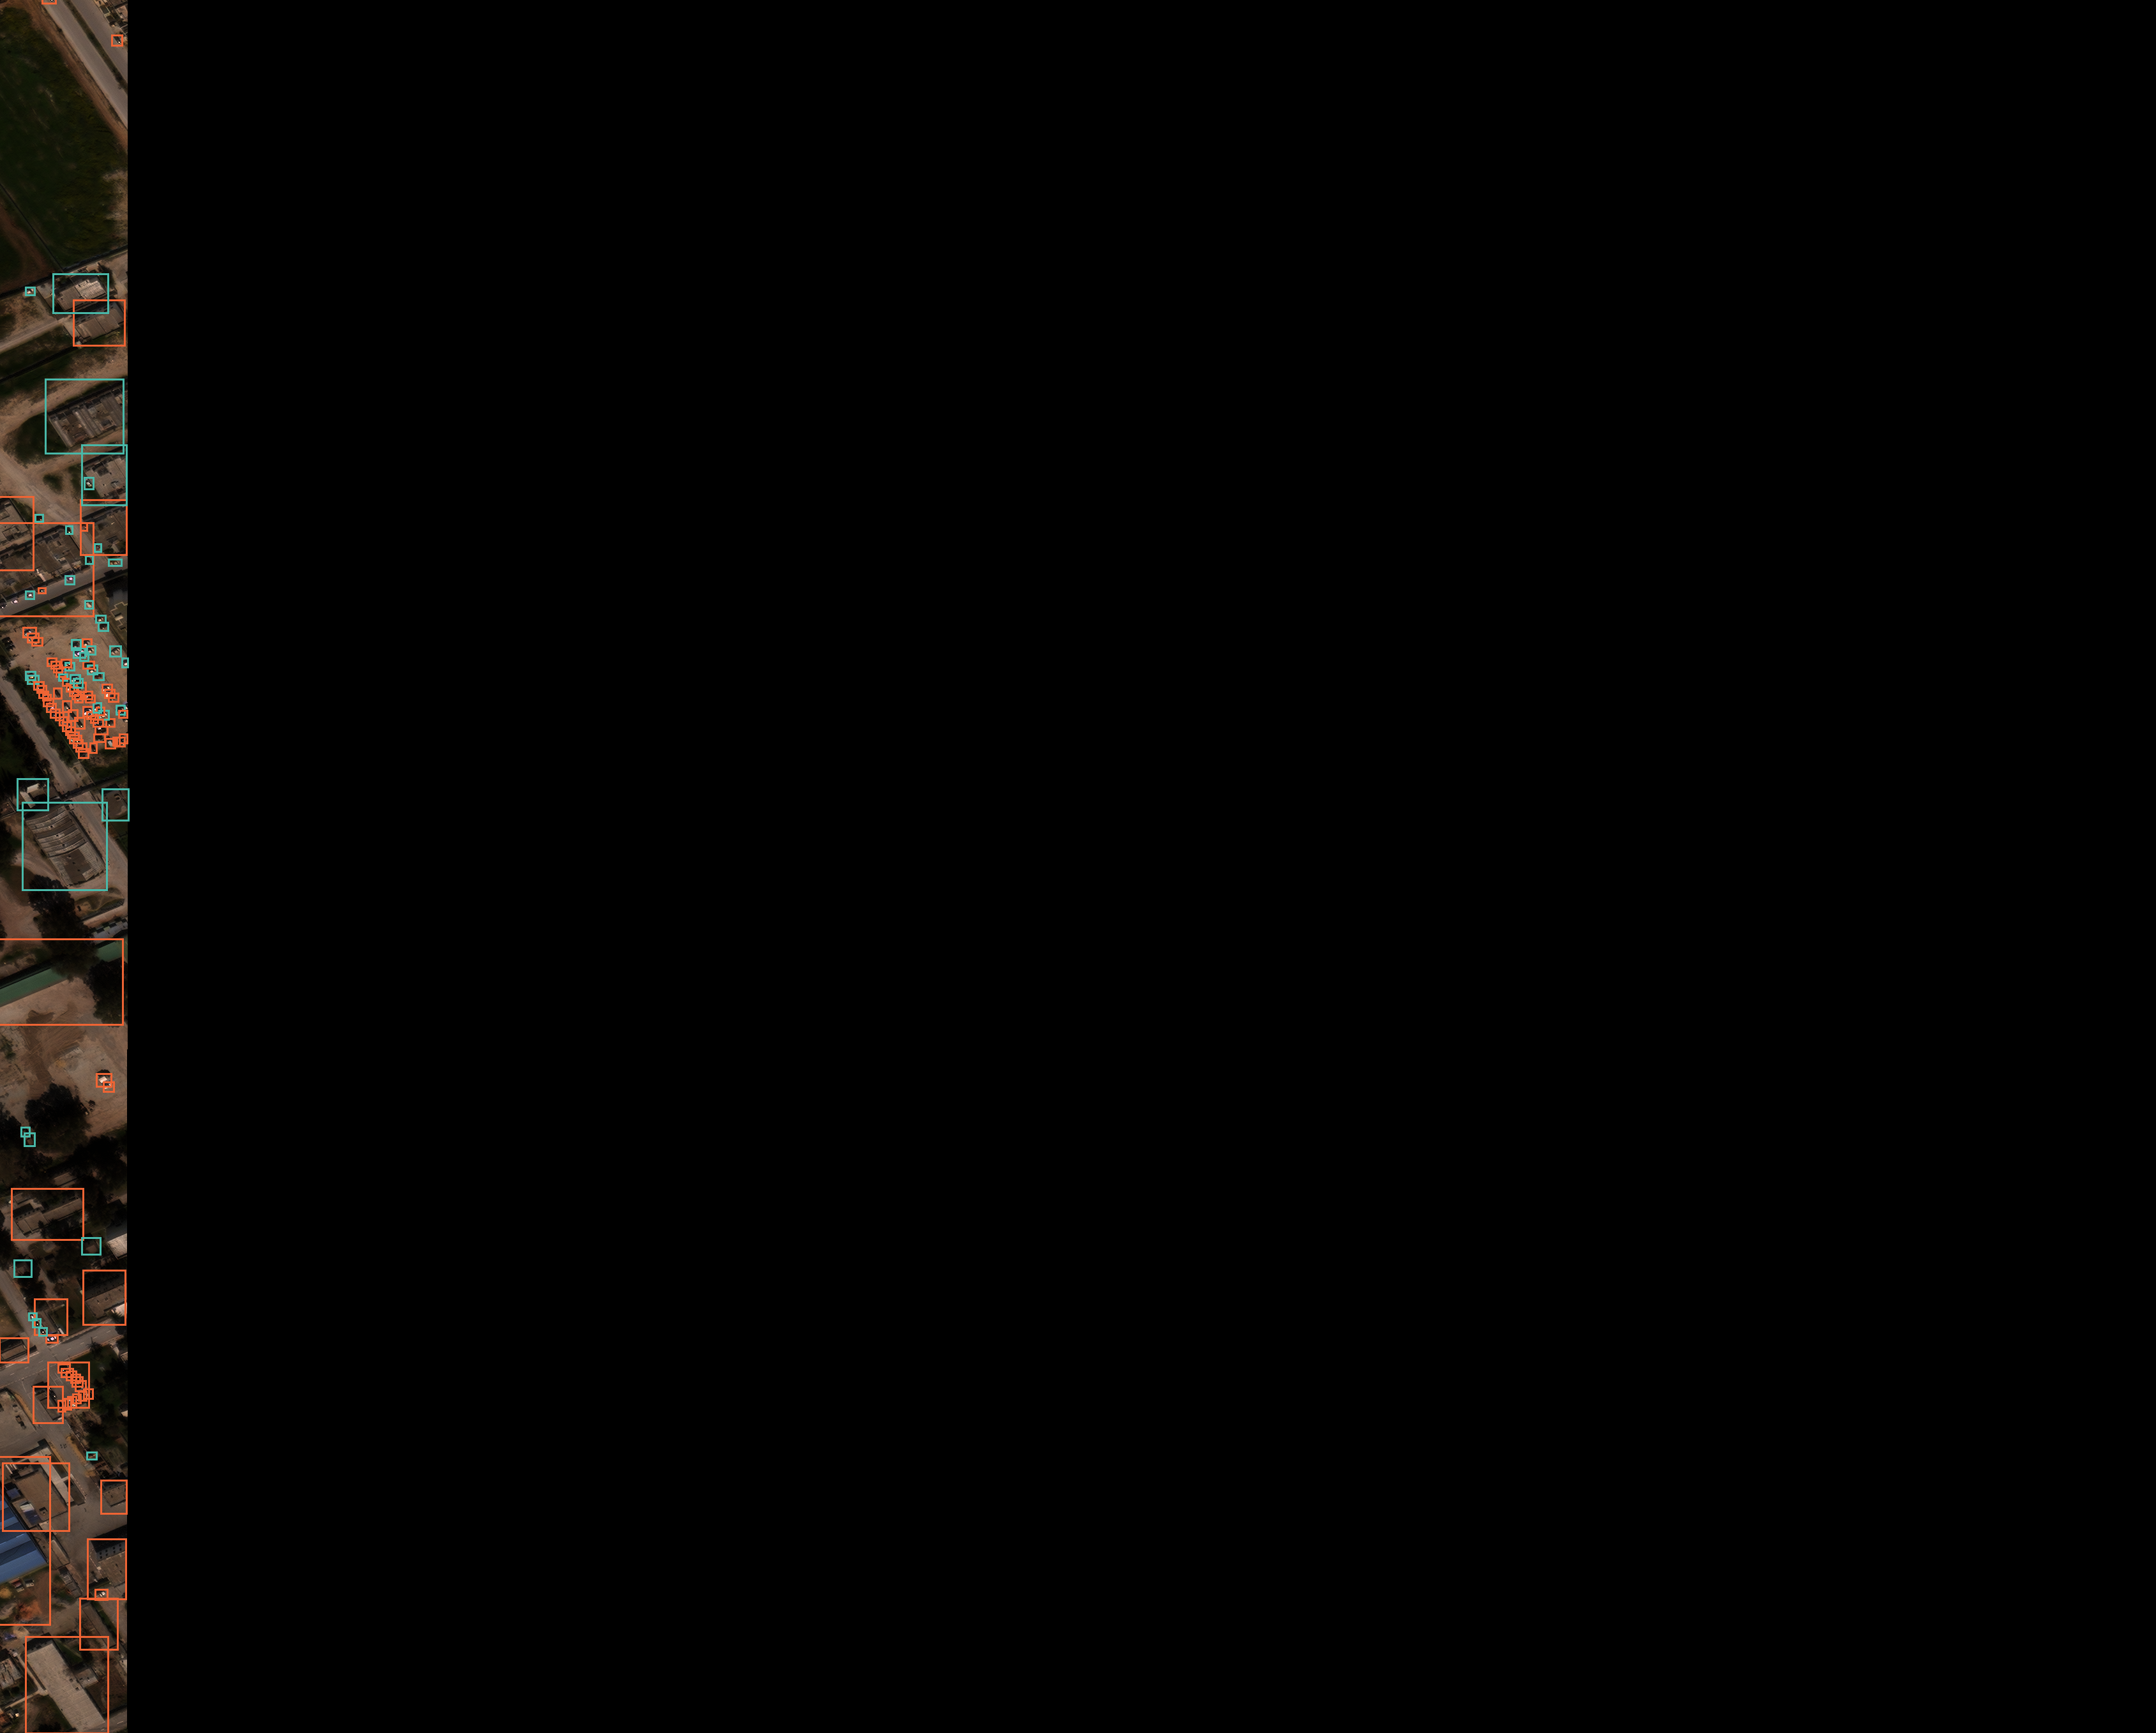

In [27]:
tru

In [65]:
car_truth_img = plot_truth(89, car_truth)
all_truth_img = plot_truth(89, all_truth)

100%|██████████| 211664/211664 [00:02<00:00, 90504.98it/s]
data_utilities/aug_util.py:202: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if classes == None:
100%|██████████| 601937/601937 [00:05<00:00, 106373.61it/s]


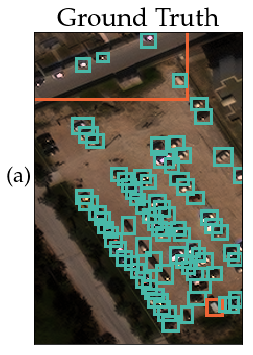

In [62]:
plt.clf()
plt.figure(figsize=cm2inch((10,13.7)))

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, 'font.size': 22})

# plt.subplot(121)
plt.title("Ground Truth")
plt.imshow(all_truth_img)

plt.tick_params(
#             axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False)

plt.ylabel("(a)", rotation=0, labelpad=14)
# plt.axis("off")
# plt.show()

# plt.subplot(122)
# plt.title("Ground Truth - Cars")
# plt.imshow(plot_truth(89, car_truth))
# plt.axis("off")


plt.savefig(save_path + "all_ground_truth_{}".format(img_no), dpi=300)
# plt.show()

/Users/heidihurst/anaconda/envs/images27/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


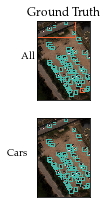

In [30]:
plt.clf()
plt.figure(figsize=(2,1.5*2))

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

ax = plt.subplot(211)
ax.set_title("Ground Truth")
ax.imshow(all_truth_img)
plt.tick_params(
#             axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False)
ax.set_ylabel("All", rotation=0, labelpad=10)


ax = plt.subplot(212)
# ax.title("Ground Truth - Cars")
ax.imshow(car_truth_img)
# ax.axis("off")
plt.tick_params(
#             axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False)
ax.set_ylabel("Cars", rotation=0, labelpad=20)

plt.savefig(save_path + "ground_truth_{}".format(img_no), dpi=300)
plt.show()

In [31]:
all_truth_img.save(save_path + "all_truth_{}.png".format(img_no))

## Plot Arbitrary Annotated Image

In [62]:
def plot_boxes(img_no=89, df="1", trial="t9", crop_rect=[0, 900, 200, 1200], thresh=0.5, width=3.0):
    # return PIL image with boxes plotted on top
    text = "../data/{}/{}_{}_{}.tif.txt".format(img_no, trial, df, img_no)
    
    if trial=="t9":
        img = "../data/{}/{}_upsample_{}.tif".format(img_no,img_no, df)
    elif trial=="t7":
#         print()
        img = "../data/{}/{}_downsample_{}.tif".format(img_no,img_no, df)
        crop_rect = [x/float(df) for x in crop_rect]
#         return
    
    # create image
    im = np.array(Image.open(img))
    # get coords
    results = np.loadtxt(text)
    best_results = [x[0:4] for x in results if x[5]>=thresh]
    best_results = np.array(best_results)
    # plot boxes using utils
    viz = aug.draw_bboxes(im,best_results, width=3.0)
    
    return viz.crop(crop_rect)

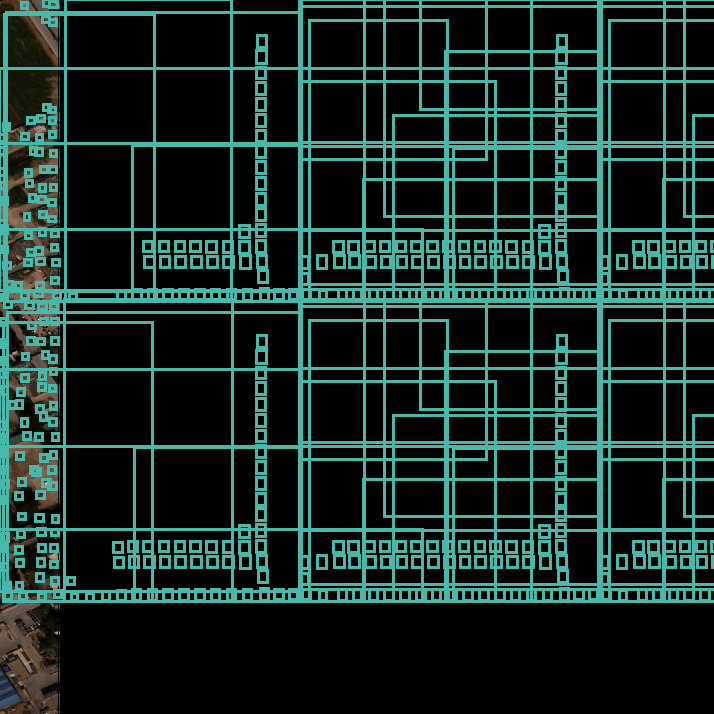

In [33]:
plot_boxes(trial="t7", df="3.5", thresh=0.05, crop_rect=[0,0,2500,2500])

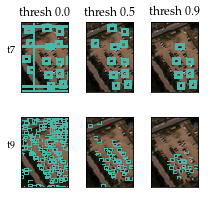

In [34]:
# visualize how threshold changes for both trials
# thresh = [0, 0.5, 0.9]


# plt.figure()
# plt.subplot(131)
# plt.imshow(plot_boxes(thresh=0))
# plt.title("Thresh=0")
# plt.axis("off")

# plt.subplot(132)
# plt.imshow(plot_boxes(thresh=0.5))
# plt.title("Thresh=0.5")
# plt.axis("off")

# plt.subplot(133)
# plt.imshow(plot_boxes(thresh=0.9))
# plt.title("Thresh=0.8")
# plt.axis("off")

# plt.show()

# plot all 14 trials (parking lot)
f=[0, 0.5, 0.9]
trials=["t7", "t9"]
img_no=89
df = "4"

plt.clf()
plt.figure(figsize=(len(f), 1.5*len(trial)))
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

for i in range(len(trials)):
    for j in range(len(f)):
        ax = plt.subplot(len(trials),len(f),1+len(f)*i+j)
        ax.imshow(plot_boxes(df=df, thresh=f[j], trial=trials[i]))
        
        # add title to first row
        if i == 0:
            ax.set_title("thresh {:.1f}".format(float(f[j])))
    
        plt.tick_params(
#             axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            left=False,
            labelleft=False,
            labelbottom=False)
        
        # add fake y label to first column
        if j == 0:
            ax.set_ylabel(trials[i], rotation=0, labelpad=10)

plt.savefig(save_path + "thresh_comparison_{}_df_{}".format(img_no, df), dpi=300)
plt.show()

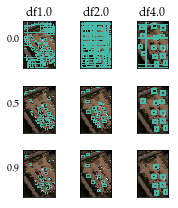

In [35]:
# plot all 14 trials (parking lot)
f=[0, 0.5, 0.9]
# trials=["t7", "t9"]
trials=["t7"]
img_no=89
df = ["1","2","4"]

plt.clf()
plt.figure(figsize=(len(trials)*len(df),len(f)))
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

for i in range(len(f)):
    for j in range(len(trials)):
        for k in range(len(df)):
            
            ax = plt.subplot(len(f),len(trials)*len(df),1+(len(df)*len(trials))*i+k+len(df)*j)
#             print(len(f),len(trials)*len(df),1+(len(df)*len(trial))*i + j*len(df) + k)
            ax.imshow(plot_boxes(df=df[k], thresh=f[i], trial=trials[j]))

            # add title to first row
            if i == 0:
                ax.set_title("df{:.1f}".format(float(df[k])))

            plt.tick_params(
    #             axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                left=False,
                labelleft=False,
                labelbottom=False)

            # add fake y label to first column
            if j == 0 and k == 0:
                ax.set_ylabel("{:0.1f}".format(f[i]), rotation=0, labelpad=10)

plt.savefig(save_path + "thresh_comparison_{}_df_{}_trial_{}".format(img_no, df,trials), dpi=300)
plt.show()

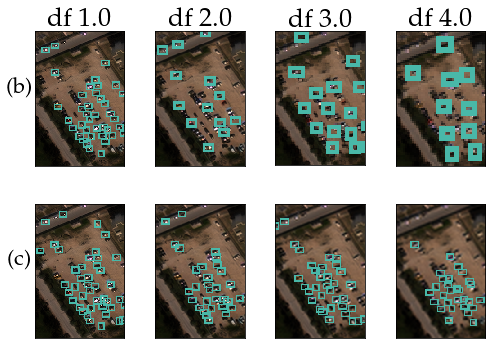

In [44]:
# plot all 14 trials (parking lot)
f=["1", "2", "3", "4"]
trials=["t7", "t9"]
lab=["(b)","(c)"]
thresh=0.8
img_no=89

plt.clf()
# plt.figure(figsize=(len(f), 1.5*len(trial)))
plt.figure(figsize=cm2inch((18.67,14)))

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, 'font.size': 22})
# matplotlib.rcParams.update({'font.size': 22})

for i in range(len(trials)):
    for j in range(len(f)):
        ax = plt.subplot(len(trials),len(f),1+len(f)*i+j)
        ax.imshow(plot_boxes(df=f[j], thresh=thresh, trial=trials[i], width=3.0/float(f[j])))
        
        # add title to first row
        if i == 0:
            ax.set_title("df {:.1f}".format(float(f[j])))
    
        plt.tick_params(
#             axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            left=False,
            labelleft=False,
            labelbottom=False)
        
        # add fake y label to first column
        if j == 0:
            ax.set_ylabel(lab[i], rotation=0, labelpad=14)

plt.savefig(save_path + "results_comparison_{}_thresh_{}2".format(img_no, int(thresh*10)), dpi=300)
plt.show()

/Users/heidihurst/anaconda/envs/images27/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


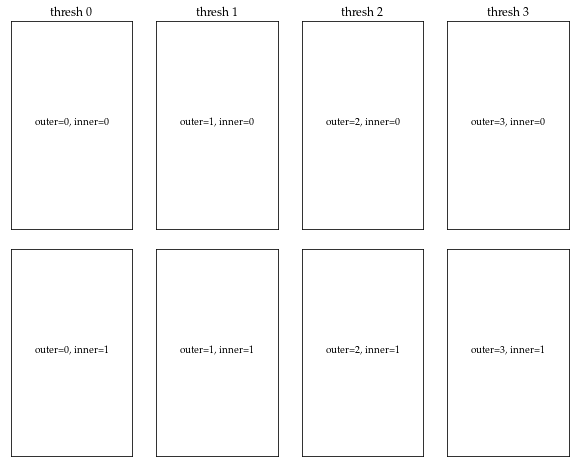

In [38]:
import matplotlib.gridspec as gridspec

%matplotlib inline

fig = plt.figure(figsize=(10, 8))
outer = gridspec.GridSpec(1, 4, wspace=0.2, hspace=0.2)

for i in range(4):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    for j in range(2):
            
        ax = plt.Subplot(fig, inner[j])
        
                # add title to first row
        if j == 0:
            ax.set_title("thresh {}".format(i))
        
        t = ax.text(0.5,0.5, 'outer=%d, inner=%d' % (i,j))
        t.set_ha('center')
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)

fig.show()

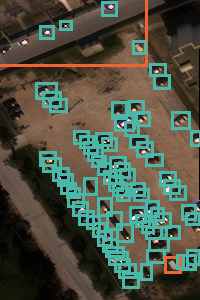

In [68]:
all_truth_img

In [71]:
single_truth = plot_truth(89, all_truth, crop_rect=cr2)

100%|██████████| 601937/601937 [00:05<00:00, 106400.30it/s]


In [85]:
plt.clf()
# plt.figure(figsize=cm2inch((10,13.7)))
plt.figure(figsize=(3,2))

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, 'font.size': 12})

# plt.subplot(121)
plt.title("Ground Truth")
plt.imshow(single_truth)

plt.tick_params(
#             axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    labelleft=False,
    labelbottom=False)

plt.ylabel("(a)", rotation=0, labelpad=14)
# plt.axis("off")
# plt.show()

# plt.subplot(122)
# plt.title("Ground Truth - Cars")
# plt.imshow(plot_truth(89, car_truth))
# plt.axis("off")


plt.savefig(save_path + "single_car_gt".format(img_no), dpi=300)
# plt.show()

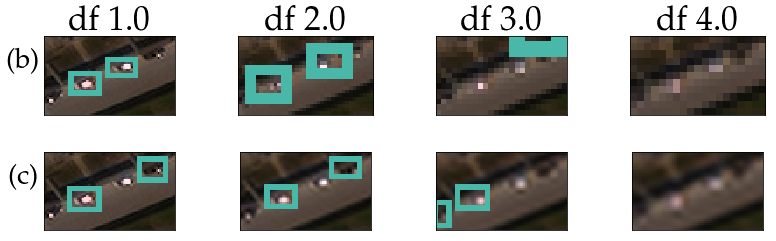

In [88]:
# plot car of interest
f=["1", "2", "3", "4"]
trials=["t7", "t9"]
lab=["(b)","(c)"]
thresh=0.8
img_no=89

plt.clf()
# plt.figure(figsize=(len(f), 1.5*len(trial)))
# plt.figure(figsize=cm2inch((18.67,14)))
plt.figure(figsize=(3*len(f),2*2))

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, 'font.size': 28})
# matplotlib.rcParams.update({'font.size': 22})

for i in range(len(trials)):
    for j in range(len(f)):
        ax = plt.subplot(len(trials),len(f),1+len(f)*i+j)
        ax.imshow(plot_boxes(df=f[j], thresh=thresh, trial=trials[i], crop_rect=cr2, width=3.0/float(f[j])))
        
        # add title to first row
        if i == 0:
            ax.set_title("df {:.1f}".format(float(f[j])))
    
        plt.tick_params(
#             axis='y',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            left=False,
            labelleft=False,
            labelbottom=False)
        
        # add fake y label to first column
        if j == 0:
            ax.set_ylabel(lab[i], rotation=0, labelpad=20)

plt.savefig(save_path + "single_car_comparison".format(img_no, int(thresh*10)), dpi=300)
plt.show()